# Classifying Food Manufacturers

### Notebook 1

## Problem Statement

## Executive Summary

## Table of Contents

1. [Importing Packages](#Importing-Packages)
2. [Reading Data](#Reading-Data)
3. [EDA and Cleaning](#EDA-and-Cleaning)
    1. [Initial EDA](#Initial-EDA)
        1. [Food Info](#Food-Info)
        2. [Food Names](#Food-Names)
        3. [Nutrient Info](#Nutrient-Info)
        4. [Nutrient Names](#Nutrient-Names)
    2. [Data Cleaning](#Data-Cleaning)
        1. [Duplicate Energy](#Duplicate-Energy)
        1. [Nutrient Pivot Table](#Nutrient-Pivot-Table)
        2. [Merging Dataframes](#Merging-Dataframes)
        3. [Null Brand Owners](#Null-Brand-Owners)
        4. [Calculating Energy](#Calculating-Energy)
    3. [Additional EDA/Cleaning](#Additional-EDA/Cleaning)
4. [Preprocessing](#Preprocessing)
5. [Modeling](#Modeling)
    1. [Logistic Regression](#Logistic-Regression)
    2. [K-Nearest Neighbors](#K-Nearest-Neighbors)
    3. [Multinomial Naive Bayes](#Multinomial-Naive-Bayes)
    4. [Random Forest](#Random-Forest)
    5. [Boosted Decistion Tree](#Boosted-Decistion-Tree)
6. [Model Evaluations](#Model-Evaluations)
    1. [Accuracy](#Accuracy)
    2. [ROC Curve](#ROC-Curve)
7. [Conclusions and Recommendations](#Conclusions-and-Recommendations)
    1. [Conclusions](#Conclusions)
    2. [Recommendations](#Recommendations)

## Importing Packages

In [245]:
# importing all the things that might be useful
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re



# making the magic happen for plots
%matplotlib inline

# setting options for better viewing
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

## Reading Data

 The full databse is split up among many tables, so there are several datasets that need to be loaded in to work with. These include the datasets including the food product names, food product information, nutrient names, and complete nutrional information for each food.

In [246]:
# reading in food info db
food_info = pd.read_csv("./datasets/branded_food.csv")

In [247]:
# reading in food names/ids database
food_names = pd.read_csv("./datasets/food.csv")

In [248]:
# reading in nutrient info db
nutrient_info = pd.read_csv("./datasets/food_nutrient.csv")

In [249]:
# reading in nutrient names/ids
nutrient_names = pd.read_csv("./datasets/nutrient.csv")

## EDA and Cleaning

### Initial EDA

It is always important to get an initial idea of what all of the data looks like. Since there was a warning about mixed data types for the `food_info` dataframe, it is especially important to understand what form the entries are in.

### Food Info

In [250]:
# checking the head for what the data looks like
food_info.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,modified_date,available_date
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,LI,2017-11-15,2017-11-15
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26


In [251]:
# checking nulls of food_info
food_info.isnull().sum()

fdc_id                            0
brand_owner                     823
gtin_upc                          0
ingredients                    2534
serving_size                      0
serving_size_unit                 0
household_serving_fulltext     1402
branded_food_category         10118
data_source                       0
modified_date                     0
available_date                    0
dtype: int64

In [252]:
# checking data types of food_info
food_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260370 entries, 0 to 260369
Data columns (total 11 columns):
fdc_id                        260370 non-null int64
brand_owner                   259547 non-null object
gtin_upc                      260370 non-null object
ingredients                   257836 non-null object
serving_size                  260370 non-null float64
serving_size_unit             260370 non-null object
household_serving_fulltext    258968 non-null object
branded_food_category         250252 non-null object
data_source                   260370 non-null object
modified_date                 260370 non-null object
available_date                260370 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 21.9+ MB


There is not much in this table to see in terms of statisical summary, since most of the columns are categorical and many of the numerical columns are simply for identification. We can still see what the serving sizes look like, however.

In [253]:
food_info["serving_size"].describe().round(2)

count    260370.00
mean         80.60
std          89.59
min           0.02
25%          28.00
50%          42.00
75%         112.00
max        3750.00
Name: serving_size, dtype: float64

There are some null values in this main dataset, with the most being in the food category section (representing 3.89% of the data). This category may be a useful feature to have during the modeling process, so we should attempt to discover a bit more about these entries. There are also a fair amount missing from the brand owner and ingredients columns, which are a bit more serious. Most of this work is going to center around having and ingredients list and some indentifying information about who is making the product, so we will have to pay particular attention to these entries, and identify if values can be reasonably imputed or not.

For the dataypes, which there was a warning about earlier, there is an odd column, `gtin_upc` that is showing as an object, even though the UPC code should be a number. The other column appear to be in their proper formats so far.

### Food Names

In [254]:
# checking the head for what the data looks like
food_names.head()

,fdc_id,data_type,description,food_category_id,publication_date
0,356425,branded_food,MOCHI ICE CREAM BONBONS,NaN,2019-04-01
1,356426,branded_food,CHIPOTLE BARBECUE SAUCE,NaN,2019-04-01
2,356427,branded_food,HOT & SPICY BARBECUE SAUCE,NaN,2019-04-01
3,356428,branded_food,BARBECUE SAUCE,NaN,2019-04-01
4,356429,branded_food,BARBECUE SAUCE,NaN,2019-04-01


In [255]:
# checking nulls of food_names
food_names.isnull().sum()

fdc_id                   0
data_type                0
description              0
food_category_id    260370
publication_date         0
dtype: int64

In [256]:
# checking data types of food_names
food_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260370 entries, 0 to 260369
Data columns (total 5 columns):
fdc_id              260370 non-null int64
data_type           260370 non-null object
description         260370 non-null object
food_category_id    0 non-null float64
publication_date    260370 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ MB


The `food_category_id` is completely empty, so we can basically just ignore it. The`food_info` dataframe contains most of the products' category information anyway. Other than that, this dataframe appears to be clean at the first check.

In [257]:
# dropping null col
food_names.drop(columns=["food_category_id"], inplace=True)

### Nutrient Info

In [258]:
# checking the head for what the data looks like
nutrient_info.head()

,id,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,footnote,min_year_acquired
0,3383047,356425,1079,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN
1,3383048,356425,1087,50.0,NaN,75,NaN,NaN,NaN,NaN,NaN
2,3383049,356425,1089,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN
3,3383050,356425,1104,0.0,NaN,75,NaN,NaN,NaN,NaN,NaN
4,3383051,356425,1162,3.0,NaN,75,NaN,NaN,NaN,NaN,NaN


In [259]:
# checking nulls in nutrient_info
nutrient_info.isnull().sum()

id                         0
fdc_id                     0
nutrient_id                0
amount                     0
data_points          3531185
derivation_id              0
min                  3531185
max                  3531185
median               3531185
footnote             3531185
min_year_acquired    3531185
dtype: int64

In [260]:
# checking data types of nutrient_info
nutrient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531185 entries, 0 to 3531184
Data columns (total 11 columns):
id                   int64
fdc_id               int64
nutrient_id          int64
amount               float64
data_points          float64
derivation_id        int64
min                  float64
max                  float64
median               float64
footnote             float64
min_year_acquired    float64
dtypes: float64(7), int64(4)
memory usage: 296.3 MB


Like with the `food_info` dataframe, there is only one numerical column that is worth looking at, which is the amount of each nutrient in each food. Referencing the supplied data dictionary shows that this clolumn represent the amount of the specified nutrient present in 100g of each of the food products.

In [261]:
nutrient_info["amount"].describe().round(2)

count     3531185.00
mean          154.36
std         40956.04
min             0.00
25%             0.00
50%             3.60
75%            40.00
max      65789473.68
Name: amount, dtype: float64

We have a lot of null values here, with the columns `data_points`, `min`, `max`, `median`, and `footnote` all being completely empty. This does make cleaning up the columns quite easy, since if they contain no information they can be removed, and the remaining columns appear to be in their proper data types, with no other null values.

There is also an interesting value of 65,789,473 as the maximum amount of a nutrient per 100g of food. This seems unlikely to be a true value, so we will have to determine where that value is showing up, and if there are any other values like it.

### Nutrient Names

In [262]:
# checking the head for what the data looks like
nutrient_names.head()

,id,name,unit_name,nutrient_nbr,rank
0,1002,Nitrogen,G,202.0,500.0
1,1003,Protein,G,203.0,600.0
2,1004,Total lipid (fat),G,204.0,800.0
3,1005,"Carbohydrate, by difference",G,205.0,1110.0
4,1007,Ash,G,207.0,1000.0


In [263]:
# checking nulls for nutrient_names
nutrient_names.isnull().sum()

id              0
name            0
unit_name       0
nutrient_nbr    0
rank            1
dtype: int64

In [264]:
nutrient_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 5 columns):
id              227 non-null int64
name            227 non-null object
unit_name       227 non-null object
nutrient_nbr    227 non-null float64
rank            226 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.9+ KB


In [265]:
nutrient_names.describe()

,id,nutrient_nbr,rank
count,227.000000,227.000000,226.000000
mean,1286.568282,497.475771,71425.601770
std,280.881417,191.178465,239201.102382
min,1002.000000,202.000000,100.000000
25%,1111.500000,322.500000,7232.500000
50%,1216.000000,503.000000,10650.000000
75%,1305.500000,645.500000,15190.000000
max,2032.000000,861.000000,999999.000000


In [266]:
nutrient_names[nutrient_names["rank"].isnull()]

,id,name,unit_name,nutrient_nbr,rank
23,1072,"Carbohydrate, other",G,284.0,NaN


There is one entry where the "rank" is null, which is some form of carbohydrate declaration. Unfortunately, there is no description of this category, and it is currently unclear what this rank may meanm, from the odd range of values that it takes.

### Data Cleaning

One of the first cleaning steps we can take is to drop some of the columns in the datasets that were completely empty from the beginning. There is no information to gain from them, and no basis for knowing or imputing any of the values.

In [267]:
# making list of the null columns
null_cols = ["data_points", "min", "max", "median", "footnote", "min_year_acquired"]

# dropping the null cols from df
nutrient_info.drop(columns=null_cols, inplace=True)

# checking df for drop
nutrient_info.head()

,id,fdc_id,nutrient_id,amount,derivation_id
0,3383047,356425,1079,0.0,75
1,3383048,356425,1087,50.0,75
2,3383049,356425,1089,0.0,75
3,3383050,356425,1104,0.0,75
4,3383051,356425,1162,3.0,75


### Duplicate Energy

When previously attempting to combine and pivot the nutrients so that they can be transferred into a final food dataframe, it was noticed that there were duplicate nutrient names preventing the transposition. This duplicate entry needs to be identified and dealt with before the data can be brought together.

In [268]:
# finding duplicated nutrient name
nutrient_names[nutrient_names["name"].duplicated()]

,id,name,unit_name,nutrient_nbr,rank
21,1062,Energy,kJ,268.0,400.0


There appears to be a second "energy" entry, which is in kilojoules, instead of kilocalories, which are typical for US foods. This will be further explored in the `nutrient_info`to see how many entries are in kJ.

In [269]:
nutrient_info[nutrient_info["nutrient_id"] == 1062]["amount"]

567629      394.0
1070211     417.0
1373445      64.0
2140241     360.0
2755621     100.0
2814828     517.0
2864502     355.0
3052729     101.0
3052862    2399.0
Name: amount, dtype: float64

We have nine foods using kJ as its energy, instead of kcal. This is an easy fix, as we can simply convert to the proper format. This is a common conversion, as energy is commonly represented as kilojoules outside of the US. By using a reference from the University of Calgary, we can find that 1 kiloclarie is equal to 4.1868 kilojoules<sup>(1)</sup>.

In [270]:
# mapping the conversion 
nutrient_info.loc[nutrient_info["nutrient_id"] == 1062, "amount"] = nutrient_info[
    nutrient_info["nutrient_id"] == 1062]["amount"].map(lambda x: round(x / 4.1868, 2))

In [271]:
# checking for the updated values
nutrient_info[nutrient_info["nutrient_id"] == 1062]

,id,fdc_id,nutrient_id,amount,derivation_id
567629,5858858,398115,1062,94.11,70
1070211,4738741,431609,1062,99.60,70
1373445,4557236,454151,1062,15.29,70
2140241,4899130,510967,1062,85.98,70
2755621,5945416,554830,1062,23.88,70
2814828,4975183,559122,1062,123.48,70
2864502,4892046,562755,1062,84.79,70
3052729,5945425,575761,1062,24.12,70
3052862,5415101,575769,1062,572.99,70


Now that the values have been converted, we can change the `nutrient_id` entries to be in line with the kilocalorie ID. For this, we have to look up the target ID from the `nutrient_names` dataframe.

In [272]:
# checking the id of energies
nutrient_names[nutrient_names["name"] == "Energy"]

,id,name,unit_name,nutrient_nbr,rank
5,1008,Energy,KCAL,208.0,300.0
21,1062,Energy,kJ,268.0,400.0


If we can now convert the ID of the kJ entries to be the KCAL ID, we can merge the two dataframes, and the names should sync up with the KCAL name instead.

In [273]:
# checking the count of kJ entries before replacement
nutrient_info[nutrient_info["nutrient_id"] == 1062].count()

id               9
fdc_id           9
nutrient_id      9
amount           9
derivation_id    9
dtype: int64

In [274]:
# repalcing the id numbers
nutrient_info["nutrient_id"].replace(to_replace=1062, value=1008, inplace=True)

In [275]:
# checking the count of kJ entries after replacement
nutrient_info[nutrient_info["nutrient_id"] == 1062].count()

id               0
fdc_id           0
nutrient_id      0
amount           0
derivation_id    0
dtype: int64

In [276]:
nutrient_info[nutrient_info["nutrient_id"] == 1008]["derivation_id"].value_counts()

70    248155
71       476
73        84
72        14
78        13
74         1
Name: derivation_id, dtype: int64

The last step to take is to rename the `id` column on the `nutrient_names` dataframe, so that there is a common column to merge the two tables on.

In [277]:
nutrient_names.rename(axis=1, mapper={"id": "nutrient_id"}, inplace=True)

Now we can merge the dataframes, to have the nutrient amounts attached ato their actual names, instead of IDs.

In [278]:
# merging both dfs in one main nutrients df
nutrients = nutrient_info.merge(nutrient_names, on="nutrient_id")
nutrients.head()

,id,fdc_id,nutrient_id,amount,derivation_id,name,unit_name,nutrient_nbr,rank
0,3383047,356425,1079,0.0,75,"Fiber, total dietary",G,291.0,1200.0
1,3750449,356426,1079,0.0,75,"Fiber, total dietary",G,291.0,1200.0
2,3750441,356427,1079,0.0,75,"Fiber, total dietary",G,291.0,1200.0
3,3750433,356428,1079,0.0,75,"Fiber, total dietary",G,291.0,1200.0
4,3750425,356429,1079,0.0,75,"Fiber, total dietary",G,291.0,1200.0


In [279]:
# checking for proper amount of foods maintained
nutrients["fdc_id"].nunique()

260370

We now have a singular nutrition dataframe that we can bring together with the foods, however, it is not currently in a state where we can easily bring them together, since each nutrient of each food is in a row, giving us over 3.5 million total entries in this database. What what we would like to have is a pivoted version of this, where each row is a unique food product, and the columns are each of the nutrients in that food.

### Nurtient Pivot Table

In [280]:
# making pivot table of nutrients df
nutrients_pivot = nutrients.pivot_table(index = 'fdc_id', columns = 'name', values = 'amount')
nutrients_pivot.head()

name,10:0,12:0,18:2,"18:2 n-6 c,c","18:3 n-3 c,c,c (ALA)",8:0,Acetic acid,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Biotin,Caffeine,"Calcium, Ca","Carbohydrate, by difference","Carbohydrate, other","Carotene, beta","Chlorine, Cl",Cholesterol,"Choline, from phosphotidyl choline","Choline, total","Chromium, Cr","Copper, Cu",Cysteine,Cystine,Energy,Epigallocatechin-3-gallate,"Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total saturated","Fatty acids, total trans","Fiber, insoluble","Fiber, soluble","Fiber, total dietary","Fluoride, F","Folate, DFE","Folate, total",Folic acid,Fructose,Glucose (dextrose),Glutamic acid,Glutamine,Glycine,Histidine,Inositol,Inulin,"Iodine, I","Iron, Fe",Isoleucine,Lactic acid,Lactose,Leucine,Lutein + zeaxanthin,Lysine,"Magnesium, Mg","Manganese, Mn",Methionine,"Molybdenum, Mo",Niacin,Pantothenic acid,Phenylalanine,"Phosphorus, P","Potassium, K",Proline,Protein,Riboflavin,Ribose,"Selenium, Se",Serine,"Sodium, Na",Sorbitol,Starch,"Sugars, added","Sugars, total including NLEA",Taurine,Thiamin,Threonine,Total lipid (fat),Total sugar alcohols,Tryptophan,Tyrosine,Valine,"Vitamin A, IU",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin D3 (cholecalciferol),Vitamin E,Vitamin E (alpha-tocopherol),Vitamin E (label entry primarily),Vitamin K (phylloquinone),Water,Xylitol,"Zinc, Zn"
fdc_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
344604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,4.07,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,NaN,0.81,NaN,NaN,NaN,NaN,203.0,NaN,NaN,NaN,2.44,NaN,NaN,NaN,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4.07,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,0.0,0.0,0.00,0.0,0.0,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,NaN,0.81,NaN,NaN,NaN,NaN,203.0,NaN,NaN,NaN,2.44,NaN,NaN,NaN,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.21,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.21,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,0.00,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.75,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.18,NaN,NaN,NaN,NaN,89.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first thing to notice with this new dataframe is the large amount of null values. Since not every food has each nutrient listed on its label, this is not completely unexpected. However, we do need to find out the extent of the nulls in this new version of the dataset.

In [281]:
nutrients_pivot.isnull().mean().sort_values()

name
Total lipid (fat)                     0.001194
Protein                               0.001728
Carbohydrate, by difference           0.003629
Sodium, Na                            0.006971
Energy                                0.044679
Sugars, total including NLEA          0.059915
Fatty acids, total saturated          0.133537
Cholesterol                           0.148516
Fiber, total dietary                  0.165019
Iron, Fe                              0.171383
Calcium, Ca                           0.174686
Fatty acids, total trans              0.180689
Vitamin C, total ascorbic acid        0.294492
Vitamin A, IU                         0.314917
Potassium, K                          0.746138
Vitamin D                             0.841572
Fatty acids, total monounsaturated    0.861728
Fatty acids, total polyunsaturated    0.861970
Sugars, added                         0.926366
Niacin                                0.935753
Thiamin                               0.937408
Riboflav

It appears as though a large percent of these columns are mostly null. This can be explained by the fact that only a small set of nutritents are actually required to be listed on food product labels. By referencing the Code of Feeral Regulations Title 21, which covers food for human consumption, we can learn a bit more about how nutrient labels are constructed<sup>(3)</sup>.

There are only a few nutrients that are required to be on nutrition labels:
 - Calories
 - Total fat
 - Cholesterol*
 - Sodium
 - Carbohydrate total
     - Dietary fiber 
     - Total sugars*
     - Added sugars*
 - Proetin*
 
 Even within these nutrients, those marked with asterisks have additional caveats where certain foods are not required to list these on the nutrient label if there is no presence of the nutrient, and there are no other claims or declarations made about those nutrients on the packaging. So, many of these null values may actually indicate a value of `0`, but was recorded as null because it was not even present on the label. Taking this into account, we can see why the amount of null values increases sharply outside these core nutrients.
 
 In order to effectively analyze the foods we have, we are going to have to limit the amount of these nutrients we utilize as features. At the same time, we want to still include as much as possible, and ther emay be ways of estimating some of the missing values using other context clues from the foods. We can strike a balance between these two by limits our nutrients to those that have a null content of under 20%, giving us the top 12 columns.

In [282]:
# setting a list of the top 12 cols
nutr_cols = nutrients_pivot.isnull().mean().sort_values().head(12).index

# selecting for desired cols
nutrients_pivot = nutrients_pivot[nutr_cols]

# checking new df
nutrients_pivot.head()

name,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Iron, Fe","Calcium, Ca","Fatty acids, total trans"
fdc_id,,,,,,,,,,,,
344604,0.41,0.81,4.07,203.0,24.0,2.44,0.00,0.0,0.8,0.00,13.0,0.0
344605,0.41,0.81,4.07,203.0,24.0,2.44,0.00,0.0,0.8,0.00,16.0,0.0
344606,2.68,23.21,0.00,67.0,NaN,0.00,0.89,58.0,0.0,1.29,0.0,0.0
344607,2.68,23.21,0.00,67.0,NaN,NaN,0.89,58.0,0.0,1.29,0.0,NaN
344608,15.18,18.75,0.00,103.0,NaN,NaN,4.46,89.0,0.0,0.96,18.0,NaN


In [283]:
# checking info on new df
nutrients_pivot.describe()

name,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Iron, Fe","Calcium, Ca","Fatty acids, total trans"
count,260059.000000,259920.000000,259425.000000,258555.000000,248737.00000,244770.000000,225601.000000,221701.000000,217404.000000,215747.000000,214887.000000,213324.000000
mean,12.184911,6.960145,33.392049,697.876227,267.61764,16.745061,4.759690,40.075633,2.759249,3.252756,97.291642,0.035965
std,16.942800,8.334241,29.374018,2909.655998,190.03174,21.604842,7.225741,1143.367691,4.399955,131.652815,565.490665,0.518307
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.670000,31.000000,88.00000,1.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.760000,4.350000,23.330000,250.000000,267.00000,6.670000,1.790000,0.000000,1.400000,0.960000,35.000000,0.000000
75%,19.440000,10.000000,60.000000,571.000000,400.00000,25.000000,7.140000,23.000000,3.600000,2.400000,100.000000,0.000000
max,100.000000,100.000000,100.000000,100000.000000,7500.00000,100.000000,100.000000,100000.000000,100.000000,26666.670000,93750.000000,53.570000


Now that we have narrowed down our nutrient columns, we seem to have actually taken care of one of the previous issues that was spotted, which were some suspiciously high values for the nutrient amounts. While some of these numbers are still quite high, they are much more reasonable to be the correct values, especially since there are no doubt some very unhealthy foods on this list.

### Merging Dataframes

We now have our final nutrients dataframe, ready to be merged into the actual food products. This would be a good time to also combine the `food_info` and `food_names` dataframes into a master `foods` df, and make any additional changes before making the final combination and cleaning steps.

In [320]:
# attaching food names onto their food IDs
foods = food_info.merge(food_names, on="fdc_id")
foods.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,data_source,modified_date,available_date,data_type,description,publication_date
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,LI,2017-11-15,2017-11-15,branded_food,MOCHI ICE CREAM BONBONS,2019-04-01
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,CHIPOTLE BARBECUE SAUCE,2019-04-01
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,HOT & SPICY BARBECUE SAUCE,2019-04-01
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,BARBECUE SAUCE,2019-04-01
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",LI,2018-04-26,2018-04-26,branded_food,BARBECUE SAUCE,2019-04-01


In [321]:
# checking different values of data_types col
foods["data_type"].value_counts()

branded_food    260370
Name: data_type, dtype: int64

A few of these columns are not necessary for our research purposes, such as the dates that the labels were added or modified, and the data source. The `data_type` column only has one value for the entire dataset, so it is also not supplying us with any additional information. These extra columns will be dropped for clarity.

In [322]:
drop_cols = ["data_source", "modified_date", "available_date", "data_type", "publication_date"]
foods.drop(columns=drop_cols, inplace=True)
foods.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE


This seems like a good time to make our final merge, into one dataframe that we can continue using for the rest of the project. As both separate dataframes already have an `fdc_id` column, this should be a simple merge to make.

In [323]:
foods = foods.merge(nutrients_pivot, left_on="fdc_id", right_on=nutrients_pivot.index)
foods.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Iron, Fe","Calcium, Ca","Fatty acids, total trans"
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,6.25,2.5,35.00,75.0,200.0,30.00,3.75,25.0,0.0,0.0,50.0,0.0
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,0.00,0.0,43.24,703.0,162.0,37.84,0.00,0.0,0.0,0.0,0.0,0.0
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,0.00,0.0,41.18,676.0,176.0,35.29,0.00,0.0,0.0,0.0,0.0,0.0
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,34.29,971.0,143.0,28.57,0.00,0.0,0.0,0.0,0.0,0.0
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,45.95,757.0,189.0,43.24,0.00,0.0,0.0,0.0,0.0,0.0


Now that the final dataframe has been brought together, some additional cleaning needs to be performed before it is ready for the next steps.

The first step to take is to conver the column names of the nutrients that were just added. It would be good to make everything lowercase and remove all of the spaces.

In [324]:
# making dict for new column names
nutr_names_dict = {
    'Total lipid (fat)': "fat_total",
    'Protein': "protein",
    'Carbohydrate, by difference': "carbs",
    'Sodium, Na': "sodium",
    'Energy': "energy",
    'Sugars, total including NLEA': "sugars",
    'Fatty acids, total saturated': "fat_sat",
    'Cholesterol': "chol",
    'Fiber, total dietary': "fiber",
    'Iron, Fe': "iron",
    'Calcium, Ca': "calcium",
    'Fatty acids, total trans': "fat_trans"
}

# renaming the cols with dict
foods.rename(columns=nutr_names_dict, inplace=True)

# checking new names
foods.head()

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,fat_total,protein,carbs,sodium,energy,sugars,fat_sat,chol,fiber,iron,calcium,fat_trans
0,356425,"G. T. Japan, Inc.",19022128593,"ICE CREAM INGREDIENTS: MILK, CREAM, SUGAR, STRAWBERRIES (STRAWBERRIES, SUGAR), CORN SYRUP SOLIDS...",40.0,g,1 PIECE,Ice Cream & Frozen Yogurt,MOCHI ICE CREAM BONBONS,6.25,2.5,35.00,75.0,200.0,30.00,3.75,25.0,0.0,0.0,50.0,0.0
1,356426,FRESH & EASY,5051379043735,"WATER, SUGAR, TOMATO PASTE, MOLASSES, DISTILLED VINEGAR, CONTAINS 2% OR LESS OF: CORN STARCH, SA...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",CHIPOTLE BARBECUE SAUCE,0.00,0.0,43.24,703.0,162.0,37.84,0.00,0.0,0.0,0.0,0.0,0.0
2,356427,FRESH & EASY,5051379009434,"SUGAR, WATER, DISTILLED VINEGAR, TOMATO PASTE, MOLASSES, MODIFIED CORN STARCH, SALT, PINEAPPLE J...",34.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",HOT & SPICY BARBECUE SAUCE,0.00,0.0,41.18,676.0,176.0,35.29,0.00,0.0,0.0,0.0,0.0,0.0
3,356428,FRESH & EASY,5051379019969,"TOMATO PUREE (WATER, TOMATO PASTE), SUGAR, DISTILLED VINEGAR, MOLASSES, WATER, MODIFIED CORN STA...",35.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,34.29,971.0,143.0,28.57,0.00,0.0,0.0,0.0,0.0,0.0
4,356429,FRESH & EASY,5051379009526,"SUGAR, DISTILLED VINEGAR, WATER, TOMATO PASTE, HONEY, MOLASSES, MODIFIED CORN STARCH, SALT, CONT...",37.0,g,2 Tbsp,"Ketchup, Mustard, BBQ & Cheese Sauce",BARBECUE SAUCE,0.00,0.0,45.95,757.0,189.0,43.24,0.00,0.0,0.0,0.0,0.0,0.0


In [325]:
# refreshing ourselves on nulls
foods.isnull().sum()

fdc_id                            0
brand_owner                     823
gtin_upc                          0
ingredients                    2534
serving_size                      0
serving_size_unit                 0
household_serving_fulltext     1402
branded_food_category         10118
description                       0
fat_total                       311
protein                         450
carbs                           945
sodium                         1815
energy                        11633
sugars                        15600
fat_sat                       34769
chol                          38669
fiber                         42966
iron                          44623
calcium                       45483
fat_trans                     47046
dtype: int64

Many of these null values will require some contextual imputation, specifically in the nutrient columns. Many of these imputations will involve a modeling process within itself, and will be further undertaken during the modeling section. However, some of the missing values can be dealt with now.

### Null Brand Owners

Some of the key data points for this project are the brand owner and ingredients of each food product. With a large amount of nulls in both of these columns, we need to determine if any of the values can be imputed from the surrounding contextual information.

In [326]:
foods[foods["brand_owner"].isnull()]

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,fat_total,protein,carbs,sodium,energy,sugars,fat_sat,chol,fiber,iron,calcium,fat_trans
136564,489629,NaN,819893025287,"MIX SUGAR, BLEACHED WHEAT FLOUR, DUTCH COCOA (PROCESSED WITH ALKALI), WHEY PROTEIN CONCENTRATE, ...",80.0,g,1 PKG,"Cake, Cookie & Cupcake Mixes",TOASTED S'MORE CAKE IN A JAR MIX WITH CAKE MIX & MARSHMALLOWS,2.50,12.50,71.25,275.0,350.0,47.50,1.25,12.0,3.8,5.62,250.0,0.0
151113,503774,NaN,022000116734,"SORBITOL, GUM BASE, GLYCEROL, MANNITOL, NATURAL AND ARTIFICIAL FLAVORS; LESS THAN 2% OF: HYDROGE...",2.7,g,1 STICK,Chewing Gum & Mints,SPEARMINT RAIN SUGARFREE GUM STICKS,0.00,0.00,74.07,0.0,185.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
179259,531920,NaN,030223104346,"VANILLA YOGURT (CULTURED PASTEURIZED GRADE A LOWFAT MILK, SUGAR, MODIFIED CORN STARCH, NATURAL F...",284.0,g,1 PACKAGE,Yogurt,VANILLA YOGURT WITH STRAWBERRIES,2.11,3.17,22.89,49.0,130.0,15.49,0.88,4.0,1.1,0.38,70.0,0.0
184992,537653,NaN,024732279336,"SHRIMP, SALT, SODIUM TRIPOLYPHOSPHATE (TO RETAIN MOISTURE).",85.0,g,3 ONZ,Frozen Fish & Seafood,COOKED SHRIMP,1.76,24.71,0.00,282.0,118.0,0.00,0.00,200.0,0.0,2.12,71.0,0.0
185573,538234,NaN,833302006582,"FILTERED CARBONATED WATER, ORGANIC ERYTHRITOL, ORGANIC CANE SUGAR, ORGANIC KOLA NUT, ORGANIC NAT...",355.0,ml,12 ONZ,Water,ORGANIC FLAVORED SPARKLING WATER,0.00,0.00,4.23,0.0,6.0,1.41,NaN,NaN,NaN,NaN,NaN,NaN
185800,538461,NaN,826766254026,"APPLES (APPLES, CALCIUM ASCORBATE [A BLEND OF CALCIUM AND VITAMINS TO MAINTAIN COLOR]), CARAMEL ...",140.0,g,1 cup,Pre-Packaged Fruit & Vegetables,APPLE & CHEESE TRAY,7.86,4.29,22.86,143.0,179.0,17.14,5.00,18.0,2.1,0.26,143.0,0.0
185833,538494,NaN,654665430865,"WATER, SOYBEAN OIL, EGG YOLKS, MODIFIED CORNSTARCH*, VINEGAR, SUGAR, SALT, CONTAINS 2% OR LESS O...",15.0,ml,1 Tbsp,Salad Dressing & Mayonnaise,LIGHT MAYONNAISE,33.33,0.00,6.67,900.0,333.0,NaN,6.67,33.0,NaN,NaN,NaN,0.0
193004,349015,NaN,00725342465996,"Organic Tomatoes, Organic Tomato Puree, Organic Basil, Sea Salt, Citric Acid",60.0,g,14 Cup,Vegetables - Prepared/Processed (Shelf Stable),MUR GLN CRUSHED TOM BASIL,0.00,1.67,8.33,183.0,42.0,3.33,NaN,0.0,1.7,1.80,33.0,NaN
193159,349170,NaN,00013562515349,"ORGANIC WHEAT FLOUR, ORGANIC SEMI-SWEET CHOCOLATE CHIPS (organic cane sugar, organic chocolate, ...",30.0,g,1 Packet,Biscuits/Cookies (Shelf Stable),ANNIES HMGRWN ORG COOKIE BITES CHOC CHIP,26.67,6.67,63.33,333.0,500.0,30.00,10.00,0.0,3.3,1.20,NaN,NaN
198012,349308,NaN,00092325333321,"BEST INGREDIENTS: WATER, EXPELLER-PRESSED CANOLA OIL, BALSAMIC VINEGAR*, HONEY*, STONEGROUND MUS...",13.0,g,2 Tbsp (31g),NaN,Annie's Balsamic Vinaigrette,76.92,0.00,15.38,462.0,769.0,7.69,7.69,0.0,0.0,0.00,0.0,0.0


Looking through some of these entries, we can see that there are in fact many brand names listed at the front of the product names in the `description` column. Taking a deeper dive into these entries may give us additional clues as the the correct values of `brand_owner`. One of the common brands seems to be "Annie's". We will use this as an example to see if we can determine the owner.

In [327]:
# making a df of non-null brand owners
owner_val = foods[foods["brand_owner"].notnull()]

In [328]:
# looking for entries with Annie's in the description
owner_val[owner_val["description"].str.contains("Annie")]

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,fat_total,protein,carbs,sodium,energy,sugars,fat_sat,chol,fiber,iron,calcium,fat_trans
149065,348248,GENERAL MILLS SALES INC.,00013562111152,"ORGANIC APPLE PUREE CONCENTRATE, ORGANIC APPLE JUICE CONCENTRATE, ORGANIC STRAWBERRY JUICE CONCE...",18.0,g,1 pouch (18g),NaN,Annie's Homegrown Organic Strawberry Fruit Bites 5ct,0.00,0.00,88.89,28.0,NaN,55.56,0.00,0.0,0.0,0.00,0.0,0.0
149066,348249,GENERAL MILLS SALES INC.,00013562111138,"ORGANIC APPLE PUREE CONCENTRATE, ORGANIC APPLE JUICE CONCENTRATE, ORGANIC CHERRY JUICE CONCENTRA...",18.0,g,1 pouch (18g),NaN,Annie's Homegrown Organic Cherry Apple Fruit Bites 5ct,0.00,0.00,88.89,56.0,NaN,55.56,0.00,0.0,0.0,0.00,0.0,0.0
149107,348290,GENERAL MILLS SALES INC.,00013562000531,"ORGANIC WHEAT FLOUR, ORGANIC EXPELLER-PRESSED SUNFLOWER OIL, ORGANIC WHOLE WHEAT FLOUR, SALT, OR...",30.0,g,27 crackers (30g),NaN,Annie's Organic Cheddar Squares Baked Cheese Crackers,23.33,10.00,63.33,833.0,NaN,0.00,3.33,0.0,3.3,2.00,0.0,0.0
149108,348291,GENERAL MILLS SALES INC.,00013562000524,"ORGANIC WHOLE WHEAT FLOUR (GRAHAM FLOUR), ORGANIC WHEAT FLOUR, ORGANIC CANE SUGAR, ORGANIC SUNFL...",31.0,g,2 full cracker sheets (31g),NaN,Annie's Organic Honey Graham Crackers,9.68,6.45,77.42,419.0,NaN,25.81,0.00,0.0,6.5,2.90,0.0,0.0
149109,348292,GENERAL MILLS SALES INC.,00013562000173,"ORGANIC WHEAT FLOUR, ORGANIC CANE SUGAR, ORGANIC EXPELLER-PRESSED SUNFLOWER OIL, ORGANIC INVERT ...",30.0,g,31 Cookies (30g),NaN,Annie's Organic Chocolate Bunny Grahams Baked Graham Snacks,15.00,6.67,73.33,233.0,NaN,30.00,1.67,0.0,3.3,1.20,500.0,0.0
149111,348294,GENERAL MILLS SALES INC.,00013562011001,"ORGANIC TAPIOCA SYRUP, ORGANIC CANE SUGAR, ORGANIC TAPIOCA SYRUP SOLIDS, ORGANIC PEAR JUICE CONC...",23.0,g,1 pouch (23g),NaN,Annie's Organic Tropical Treat Bunny Fruit Snacks,0.00,0.00,82.61,239.0,NaN,47.83,0.00,0.0,0.0,0.00,0.0,0.0
149124,348307,GENERAL MILLS SALES INC.,00013562224609,"GRANOLA (WHOLE GRAIN OATS, ORGANIC CANE SUGAR, CANOLA OIL, MIXED TOCOPHEROLS), ORGANIC TAPIOCA S...",28.0,g,1 bar (28g),NaN,Annie's Gluten Free Double Chocolate Chip Granola Bar,10.71,3.57,71.43,143.0,NaN,25.00,5.36,0.0,10.7,1.29,0.0,0.0
149130,348313,GENERAL MILLS SALES INC.,00013562302611,"ORGANIC WHEAT FLOUR, ORGANIC CANE SUGAR, ORGANIC EXPELLER-PRESSED SUNFLOWER OIL, ORGANIC WHOLE W...",30.0,g,31 Cookies (30g),NaN,Annie's Organic Friends Bunny Grahams,15.00,6.67,73.33,300.0,NaN,23.33,1.67,0.0,3.3,1.20,500.0,0.0
149150,348333,GENERAL MILLS SALES INC.,00013562011070,"ORGANIC TAPIOCA SYRUP, ORGANIC CANE SUGAR, ORGANIC TAPIOCA SYRUP SOLIDS, ORGANIC PEAR JUICE CONC...",23.0,g,1 pouch (23g),NaN,Annie's Organic Summer Strawberry Bunny Fruit Snacks,0.00,0.00,82.61,239.0,NaN,47.83,0.00,0.0,0.0,0.00,0.0,0.0
149152,348335,GENERAL MILLS SALES INC.,00013562002412,"ORGANIC PEAR JUICE CONCENTRATE, ORGANIC APPLE JUICE CONCENTRATE, ORGANIC DRIED APPLE, ORGANIC SU...",21.0,g,1 roll (21g),NaN,Annie's Organic Strawberry Really Peely Fruit Tape 6 Count,4.76,0.00,80.95,48.0,NaN,57.14,0.00,0.0,4.8,3.81,0.0,0.0


Now we can see that the other Annie's products have General Mills as the brand owner, so we can now use this value to fill in the nulls.

Expanding this out to the other brands, we want to isolate that 

In [329]:
# looping through each item with a null owner
for row in foods[foods["brand_owner"].isnull()].index:
    
    # setting a var for the first word of the description
    first = foods.loc[row]["description"].split()[0]
    
    # making the new col with the first word as the value
    foods.loc[row, "desc_brand"] = first

In [330]:
# checking for the new col
foods[foods["desc_brand"].notnull()]

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,fat_total,protein,carbs,sodium,energy,sugars,fat_sat,chol,fiber,iron,calcium,fat_trans,desc_brand
136564,489629,NaN,819893025287,"MIX SUGAR, BLEACHED WHEAT FLOUR, DUTCH COCOA (PROCESSED WITH ALKALI), WHEY PROTEIN CONCENTRATE, ...",80.0,g,1 PKG,"Cake, Cookie & Cupcake Mixes",TOASTED S'MORE CAKE IN A JAR MIX WITH CAKE MIX & MARSHMALLOWS,2.50,12.50,71.25,275.0,350.0,47.50,1.25,12.0,3.8,5.62,250.0,0.0,TOASTED
151113,503774,NaN,022000116734,"SORBITOL, GUM BASE, GLYCEROL, MANNITOL, NATURAL AND ARTIFICIAL FLAVORS; LESS THAN 2% OF: HYDROGE...",2.7,g,1 STICK,Chewing Gum & Mints,SPEARMINT RAIN SUGARFREE GUM STICKS,0.00,0.00,74.07,0.0,185.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,SPEARMINT
179259,531920,NaN,030223104346,"VANILLA YOGURT (CULTURED PASTEURIZED GRADE A LOWFAT MILK, SUGAR, MODIFIED CORN STARCH, NATURAL F...",284.0,g,1 PACKAGE,Yogurt,VANILLA YOGURT WITH STRAWBERRIES,2.11,3.17,22.89,49.0,130.0,15.49,0.88,4.0,1.1,0.38,70.0,0.0,VANILLA
184992,537653,NaN,024732279336,"SHRIMP, SALT, SODIUM TRIPOLYPHOSPHATE (TO RETAIN MOISTURE).",85.0,g,3 ONZ,Frozen Fish & Seafood,COOKED SHRIMP,1.76,24.71,0.00,282.0,118.0,0.00,0.00,200.0,0.0,2.12,71.0,0.0,COOKED
185573,538234,NaN,833302006582,"FILTERED CARBONATED WATER, ORGANIC ERYTHRITOL, ORGANIC CANE SUGAR, ORGANIC KOLA NUT, ORGANIC NAT...",355.0,ml,12 ONZ,Water,ORGANIC FLAVORED SPARKLING WATER,0.00,0.00,4.23,0.0,6.0,1.41,NaN,NaN,NaN,NaN,NaN,NaN,ORGANIC
185800,538461,NaN,826766254026,"APPLES (APPLES, CALCIUM ASCORBATE [A BLEND OF CALCIUM AND VITAMINS TO MAINTAIN COLOR]), CARAMEL ...",140.0,g,1 cup,Pre-Packaged Fruit & Vegetables,APPLE & CHEESE TRAY,7.86,4.29,22.86,143.0,179.0,17.14,5.00,18.0,2.1,0.26,143.0,0.0,APPLE
185833,538494,NaN,654665430865,"WATER, SOYBEAN OIL, EGG YOLKS, MODIFIED CORNSTARCH*, VINEGAR, SUGAR, SALT, CONTAINS 2% OR LESS O...",15.0,ml,1 Tbsp,Salad Dressing & Mayonnaise,LIGHT MAYONNAISE,33.33,0.00,6.67,900.0,333.0,NaN,6.67,33.0,NaN,NaN,NaN,0.0,LIGHT
193004,349015,NaN,00725342465996,"Organic Tomatoes, Organic Tomato Puree, Organic Basil, Sea Salt, Citric Acid",60.0,g,14 Cup,Vegetables - Prepared/Processed (Shelf Stable),MUR GLN CRUSHED TOM BASIL,0.00,1.67,8.33,183.0,42.0,3.33,NaN,0.0,1.7,1.80,33.0,NaN,MUR
193159,349170,NaN,00013562515349,"ORGANIC WHEAT FLOUR, ORGANIC SEMI-SWEET CHOCOLATE CHIPS (organic cane sugar, organic chocolate, ...",30.0,g,1 Packet,Biscuits/Cookies (Shelf Stable),ANNIES HMGRWN ORG COOKIE BITES CHOC CHIP,26.67,6.67,63.33,333.0,500.0,30.00,10.00,0.0,3.3,1.20,NaN,NaN,ANNIES
198012,349308,NaN,00092325333321,"BEST INGREDIENTS: WATER, EXPELLER-PRESSED CANOLA OIL, BALSAMIC VINEGAR*, HONEY*, STONEGROUND MUS...",13.0,g,2 Tbsp (31g),NaN,Annie's Balsamic Vinaigrette,76.92,0.00,15.38,462.0,769.0,7.69,7.69,0.0,0.0,0.00,0.0,0.0,Annie's


Now we can sort by the first word and see which entries are coming up in large amounts. The entries that actually have brand names should come up a lot, and be at the top of our list.

In [331]:
# checking the frequency of each 
foods["desc_brand"].value_counts()

CADBURY                                       302
GREEN                                          45
BASSETTS                                       38
PHILADELPHIA                                   33
DAIRYLEA                                       32
MAYNARDS                                       32
TERRY'S                                        26
BELVITA                                        24
Annie's                                        21
TOBLERONE                                      20
TREBOR                                         19
RITZ                                           18
OREO                                           18
Yoplait                                        17
HALLS                                          13
MILKA                                          11
TRIDENT                                        11
FREIA                                          10
THE                                             8
BARNY                                           6


This list shows a lot of brand names being repeated as the first word of these product descriptions. Establishing a cutoff of 10 food items per "brand" allows us to ensure that what we select for is consistently a recognizable brand name, and also covers the majority of the entries that originally had null brand owners.

In [332]:
# creating the list of brand names
brand_names = foods["desc_brand"].value_counts().head(18).index

Now that we have a list of our top brand names, we can run that through the portion of the dataframe that acutally has a filled in brand owner, and see if any of the names turn up in these descriptions.

In [333]:

### NEED HELP ### 
### PLZ HELP THIS DOESN'T WORK ###


def brand_finder(food_row):
    for name in brand_names:
        for row in owner_val.index:
            if owner_val.loc[row, "description"].startswith(name):
                food_row = owner_val.loc[row, "brand_owner"]

In [334]:

### this isn't working ###

# foods.loc[foods["brand_owner"].isnull(), "brand_owner"].map(lambda x: brand_finder(x))

In [335]:
foods[foods["brand_owner"].isnull()]

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,fat_total,protein,carbs,sodium,energy,sugars,fat_sat,chol,fiber,iron,calcium,fat_trans,desc_brand
136564,489629,NaN,819893025287,"MIX SUGAR, BLEACHED WHEAT FLOUR, DUTCH COCOA (PROCESSED WITH ALKALI), WHEY PROTEIN CONCENTRATE, ...",80.0,g,1 PKG,"Cake, Cookie & Cupcake Mixes",TOASTED S'MORE CAKE IN A JAR MIX WITH CAKE MIX & MARSHMALLOWS,2.50,12.50,71.25,275.0,350.0,47.50,1.25,12.0,3.8,5.62,250.0,0.0,TOASTED
151113,503774,NaN,022000116734,"SORBITOL, GUM BASE, GLYCEROL, MANNITOL, NATURAL AND ARTIFICIAL FLAVORS; LESS THAN 2% OF: HYDROGE...",2.7,g,1 STICK,Chewing Gum & Mints,SPEARMINT RAIN SUGARFREE GUM STICKS,0.00,0.00,74.07,0.0,185.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,SPEARMINT
179259,531920,NaN,030223104346,"VANILLA YOGURT (CULTURED PASTEURIZED GRADE A LOWFAT MILK, SUGAR, MODIFIED CORN STARCH, NATURAL F...",284.0,g,1 PACKAGE,Yogurt,VANILLA YOGURT WITH STRAWBERRIES,2.11,3.17,22.89,49.0,130.0,15.49,0.88,4.0,1.1,0.38,70.0,0.0,VANILLA
184992,537653,NaN,024732279336,"SHRIMP, SALT, SODIUM TRIPOLYPHOSPHATE (TO RETAIN MOISTURE).",85.0,g,3 ONZ,Frozen Fish & Seafood,COOKED SHRIMP,1.76,24.71,0.00,282.0,118.0,0.00,0.00,200.0,0.0,2.12,71.0,0.0,COOKED
185573,538234,NaN,833302006582,"FILTERED CARBONATED WATER, ORGANIC ERYTHRITOL, ORGANIC CANE SUGAR, ORGANIC KOLA NUT, ORGANIC NAT...",355.0,ml,12 ONZ,Water,ORGANIC FLAVORED SPARKLING WATER,0.00,0.00,4.23,0.0,6.0,1.41,NaN,NaN,NaN,NaN,NaN,NaN,ORGANIC
185800,538461,NaN,826766254026,"APPLES (APPLES, CALCIUM ASCORBATE [A BLEND OF CALCIUM AND VITAMINS TO MAINTAIN COLOR]), CARAMEL ...",140.0,g,1 cup,Pre-Packaged Fruit & Vegetables,APPLE & CHEESE TRAY,7.86,4.29,22.86,143.0,179.0,17.14,5.00,18.0,2.1,0.26,143.0,0.0,APPLE
185833,538494,NaN,654665430865,"WATER, SOYBEAN OIL, EGG YOLKS, MODIFIED CORNSTARCH*, VINEGAR, SUGAR, SALT, CONTAINS 2% OR LESS O...",15.0,ml,1 Tbsp,Salad Dressing & Mayonnaise,LIGHT MAYONNAISE,33.33,0.00,6.67,900.0,333.0,NaN,6.67,33.0,NaN,NaN,NaN,0.0,LIGHT
193004,349015,NaN,00725342465996,"Organic Tomatoes, Organic Tomato Puree, Organic Basil, Sea Salt, Citric Acid",60.0,g,14 Cup,Vegetables - Prepared/Processed (Shelf Stable),MUR GLN CRUSHED TOM BASIL,0.00,1.67,8.33,183.0,42.0,3.33,NaN,0.0,1.7,1.80,33.0,NaN,MUR
193159,349170,NaN,00013562515349,"ORGANIC WHEAT FLOUR, ORGANIC SEMI-SWEET CHOCOLATE CHIPS (organic cane sugar, organic chocolate, ...",30.0,g,1 Packet,Biscuits/Cookies (Shelf Stable),ANNIES HMGRWN ORG COOKIE BITES CHOC CHIP,26.67,6.67,63.33,333.0,500.0,30.00,10.00,0.0,3.3,1.20,NaN,NaN,ANNIES
198012,349308,NaN,00092325333321,"BEST INGREDIENTS: WATER, EXPELLER-PRESSED CANOLA OIL, BALSAMIC VINEGAR*, HONEY*, STONEGROUND MUS...",13.0,g,2 Tbsp (31g),NaN,Annie's Balsamic Vinaigrette,76.92,0.00,15.38,462.0,769.0,7.69,7.69,0.0,0.0,0.00,0.0,0.0,Annie's


In [336]:

### NOPE - NOT WORKING ###

# selecting for missing brand owner where desc. starts with annie's
# annie_mask = foods["description"].str.startswith("Annie's") & (foods["brand_owner"].isnull())
# foods[annie_mask]["brand_owner"].map()

### Calculating Energy

From our null count above, we saw over 11,000 null values in the `energy` column, meaning the calorie count is missing. Fortunately, there is an easy way to calculate calories from the surrounding nutrient context. With some reserach, it can be found that the calories from any food come from three major macronutrient groups: fat, carbohydrates, and protein. Fats supply 9 calories/gram, while carbohydrates and protein both give 4 calories/gram<sup>(4)</sup>. Therefore, we can use a simple mathematical calculation to fill in the actual calories.

In [362]:
# creating mask var
energy_mask = foods[foods["energy"].isnull()]

# checking null vals before processing
energy_mask["energy"].isnull().sum()

0

In [378]:
# making calculation from surrounding cols
foods.apply(
    lambda x: (x["fat_total"] * 9) + (x["carbs"] * 4) + (x["protein"] * 4) if np.isnan(row["energy"]) else row["energy"], axis=1)


TypeError: ("'int' object is not subscriptable", 'occurred at index 0')

In [359]:
# checking null vals after processing
energy_mask["energy"].isnull().sum()

11633

This is now a good point to save the progress that has been made so far.

In [258]:
foods.to_csv("./datasets/final_foods_df.csv")

### Additional EDA/Cleaning

To help with some of the visualization in the EDA step, it would be helpful to have a function for creating common charts.

In [235]:
# making func for top 10 of whatever counts we need
def top_10(df, col, title, xlabel, ylabel=None):
    plt.figure(figsize=(8, 6))
    df[col].value_counts(ascending=True).tail(10).plot(kind="barh")
    plt.title(title, size=20)
    plt.xlabel(xlabel, size=15)
    plt.ylabel(ylabel, size=15)

In [66]:
# checking number of unique brand owners
foods["brand_owner"].nunique()

24145

There are a lot of brand owners in this dataset, so it woudl be difficult to fully characterize all of them. It may be interesitng to see some of the owners with the most amount of products on the market, narrowing down our scope.

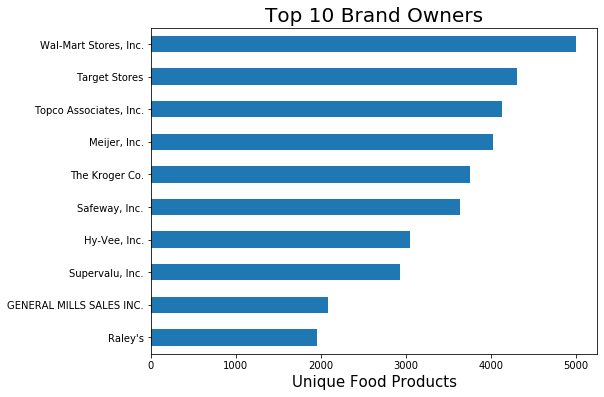

In [48]:
# plotting number of food products per owner
top_10(foods, "brand_owner", title="Top 10 Brand Owners", xlabel="Unique Food Products")

Text(0.5, 0, 'Average Calories')

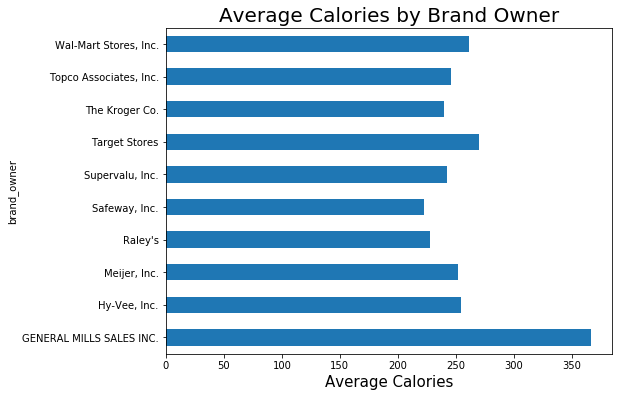

In [144]:
# making a list of the top 10 brands
top_brands = foods["brand_owner"].value_counts(ascending=False).head(10).index

# finding the average calories of their products
plt.figure(figsize=(8, 6))
foods[foods["brand_owner"].isin(top_brands)].groupby("brand_owner")["energy"].mean().plot(kind="barh")
plt.title("Average Calories by Brand Owner", size=20)
plt.xlabel("Average Calories", size=15)

This figure is showing the average calorie count of the top 10 brand owners. We saw above that the overall average calorie count for 100g of food was about 267,so most of these actually fall in line around this point. The one exception being General Mills, with an average calorie count of well over 350. This may have something to do with the types of foods that this company typically produces.

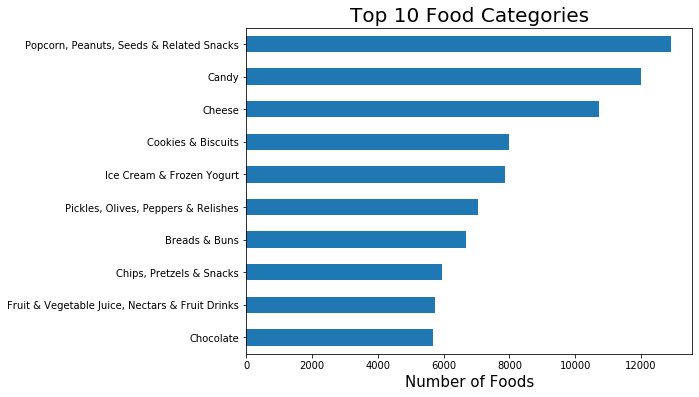

In [63]:
top_10(foods, "branded_food_category", title="Top 10 Food Categories", xlabel="Number of Foods")

We can see from this chart that most of the food items are snacks and desserts. Many of these items are most likely owned by those top ten companies from the previous chart. 

We can do something of an intersection between this chart and the previous one to see if there is a specific trend in the food categories of General Mills' products.

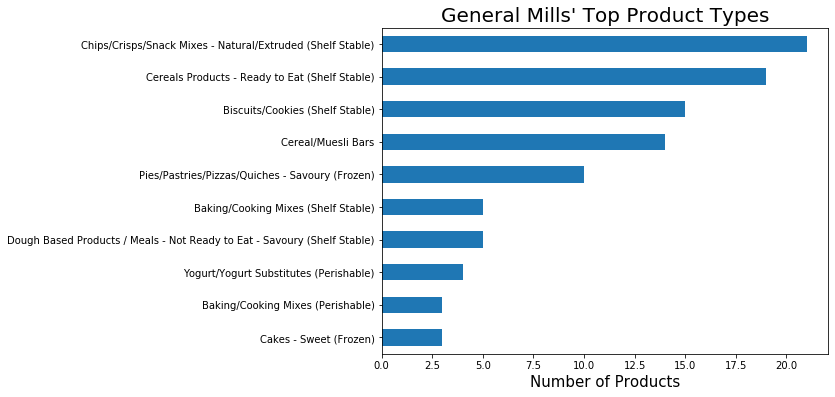

In [153]:
top_10(df=foods[foods["brand_owner"] == "GENERAL MILLS SALES INC."],
       col="branded_food_category",
       title="General Mills' Top Product Types",
       xlabel="Number of Products",
)

Here we have an outcome that is not entirely surprising, which is that the top foods from General Mills include snacks, cookies, and cakes/ 

In [50]:
# this looks weird. serving size numbers are not making sense
foods[foods["serving_size"] > 1000].sort_values(by="serving_size", ascending=False)

,fdc_id,brand_owner,gtin_upc,ingredients,serving_size,serving_size_unit,household_serving_fulltext,branded_food_category,description,Total lipid (fat),Protein,"Carbohydrate, by difference","Sodium, Na",Energy,"Sugars, total including NLEA","Fatty acids, total saturated",Cholesterol,"Fiber, total dietary","Iron, Fe","Calcium, Ca","Fatty acids, total trans"
200117,551639,ORGANICO BELLO,677294998186,"ORGANIC CHOPPED TOMATOES, ORGANIC TOMATO PUREE.",3750.0,ml,0.50 cup,Tomatoes,ORGANIC CHOPPED TOMATOES,0.00,0.05,0.19,0.0,1.0,0.13,0.00,0.0,0.1,0.04,1.0,0.00
56344,346433,ConAgra Foods Inc.,76150232530,"Popping Corn, Palm Oil, Salt, Less than 2% of: Natural and Artificial Flavor, Color Added, TBHQ ...",2808.0,g,2 tbsp (30g) unpopped (makes about 4.5 cups popped),NaN,ACT II Butter Lovers Popcorn,0.14,0.11,0.68,9.0,NaN,0.00,0.07,0.0,0.1,0.03,0.0,0.00
55907,345996,ConAgra Foods Inc.,76150232547,"Popping Corn, Palm Oil, Salt, Less than 2% of: Natural and Artificial Flavor, Color Added, TBHQ ...",2184.0,g,2 tbsp (30g) unpopped (makes about 4.5 cups popped),NaN,ACT II Butter Lovers Popcorn,0.18,0.14,0.87,11.0,NaN,0.00,0.09,0.0,0.1,0.03,0.0,0.00
83936,437001,Disk Technologies Corporation,700621453383,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, VANIL...",2091.0,g,4 ONZ,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VANILLA BEAN",0.67,0.14,1.63,3.0,11.0,1.05,0.57,0.0,0.1,0.05,3.0,0.00
84112,437177,Sculatti I.F.S.,751570510467,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, VEGAN...",2091.0,g,4 ONZ,Ice Cream & Frozen Yogurt,"SWEET ACTION ICE CREAM, ICE CREAM, VEGAN COFFEE, DOUGHNUTS",0.67,0.14,1.82,11.0,11.0,1.10,0.57,0.0,0.1,0.05,3.0,0.00
84172,437237,Reese Orchards,799491898615,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, BROWN...",2091.0,g,4 ONZ,Ice Cream & Frozen Yogurt,"SWEET ACTION, ICE CREAM, VEGAN CINNAMON ROLL",0.81,0.14,2.58,12.0,16.0,1.82,0.62,0.0,0.1,0.07,4.0,0.00
99636,452701,Disk Technologies Corporation,700621453444,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVEPORATED CANE JUICE, CHOCO...",2091.0,g,4 ONZ,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VEGAN MINT CHIP",0.77,0.14,1.87,11.0,13.0,1.15,0.62,0.0,0.1,0.07,3.0,0.00
99765,452830,Sculatti I.F.S.,751570510474,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, CHOCO...",2091.0,g,4 ONZ,Ice Cream & Frozen Yogurt,"SWEET ACTION, ICE CREAM, VEGAN COOKIES + CREAM",0.72,0.14,1.87,11.0,12.0,1.10,0.57,0.0,0.1,0.07,3.0,0.00
99766,452831,Sculatti I.F.S.,751570510498,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), STRAWBERRIES, EVAPORATED CAN...",2091.0,g,4 ONZ,Other Frozen Desserts,"SWEET ACTION, ICE CREAM, VEGAN STRAWBERRY",0.57,0.14,1.82,9.0,11.0,1.24,0.48,0.0,0.1,0.05,3.0,0.00
99767,452832,Sculatti I.F.S.,751570510511,"ORGANIC SOY MILK, ORGANIC COCONUT CREAM (COCONUT, WATER, GUAR GUM), EVAPORATED CANE JUICE, ALMON...",2091.0,g,4 ONZ,Ice Cream & Frozen Yogurt,"SWEET ACTION ICE CREAM, ICE CREAM, VEGAN COCONUT FUDGE",0.77,0.19,1.82,11.0,12.0,1.10,0.57,0.0,0.1,0.07,4.0,0.00


In [161]:
foods[foods["brand_owner"] == "GENERAL MILLS SALES INC."]["energy"].count()

117

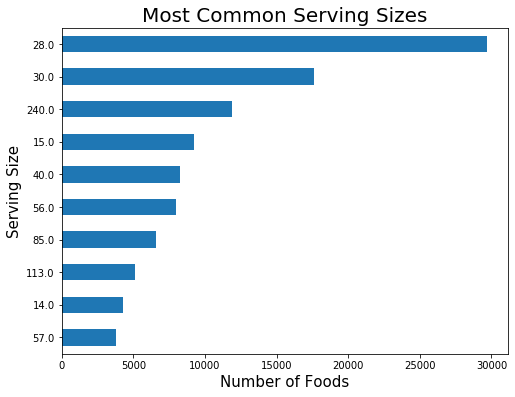

In [61]:
top_10(foods, "serving_size", title="Most Common Serving Sizes", xlabel="Number of Foods", ylabel="Serving Size")

Here we see a large mix of servings sizes being very common among our food set. 

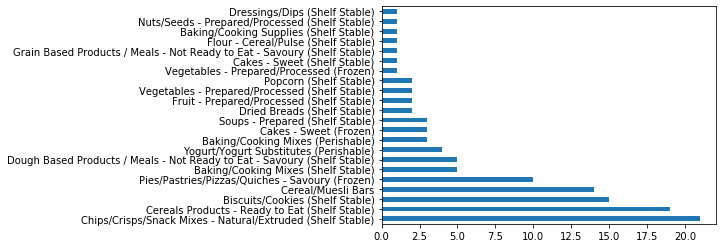

In [149]:
plt.figure(figsize=(8, 6))
foods[foods["brand_owner"] == "GENERAL MILLS SALES INC."]["branded_food_category"].value_counts().plot(
    kind="barh")
plt.title(, size=15)
plt.xlabel(, size=15)

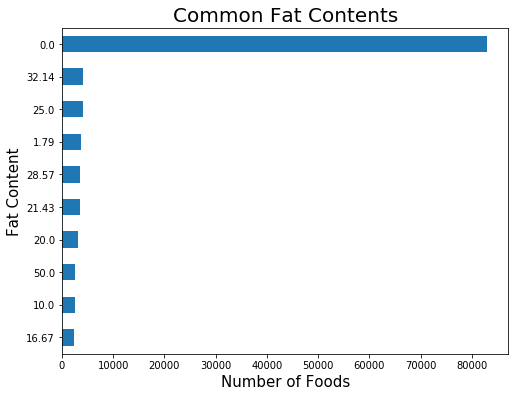

In [64]:
top_10(foods, "fat_total", title = "Common Fat Contents", xlabel="Number of Foods", ylabel="Fat Content")

This is an interesting chart, showing that by a huge margin, most of the food prodcuts in this database have no fat in them. Given what we saw in terms of the top categories of our foods, mostly being snacks and desserts, it is surprising that by far the most common entry for fat content is 0. However, going down the list after this first entry, we see some very high fat contents showing up. We saw above that the mean fat content for these foods is around 12g per 100g of food, and most of these are well above that average.

## Preprocessing

## Modeling

## Model Evaluations

## Conclusions and Recommendations

### Conclusions

### Recommendations

### Sources

1. https://energyeducation.ca/encyclopedia/Joule
2. https://dietarysupplementdatabase.usda.nih.gov/ingredient_calculator/help.php
3. https://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfcfr/CFRSearch.cfm?fr=101.9
4. https://my.clevelandclinic.org/health/articles/4182-fat-and-calories